In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = (20,10)

In [2]:
data=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
#exploratoty data analysis

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
data.shape

(5110, 12)

In [8]:
#filling the null values

In [9]:
data['bmi'].value_counts()

28.7    41
28.4    38
27.7    37
27.6    37
26.7    37
        ..
48.0     1
49.4     1
47.4     1
46.6     1
54.0     1
Name: bmi, Length: 418, dtype: int64

In [10]:
data['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [11]:
data['bmi'].fillna(data['bmi'].mean(),inplace=True)

In [12]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [13]:
data.drop('id',axis=1,inplace=True)

In [14]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [15]:
#outlier removal

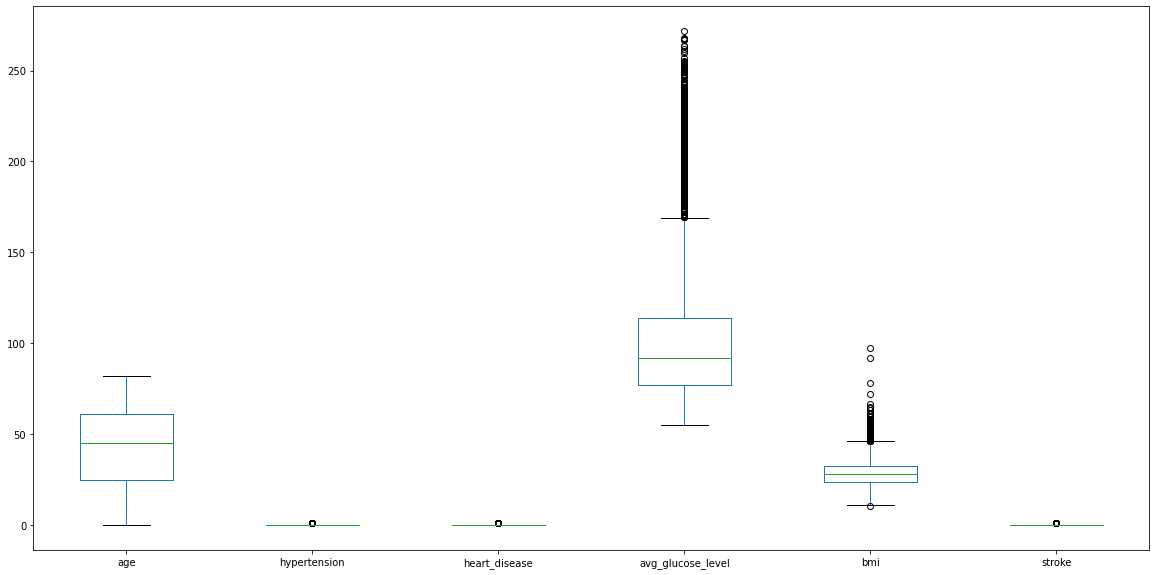

In [16]:
data.plot(kind='box')
plt.show()

In [17]:
data['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [18]:
data[data['avg_glucose_level']>114.090000]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5071,Male,81.0,0,0,Yes,Private,Rural,135.32,35.800000,Unknown,0
5076,Female,34.0,0,0,Yes,Private,Rural,174.37,23.000000,never smoked,0
5086,Female,51.0,0,0,Yes,Private,Urban,152.56,21.800000,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0


In [19]:
data['avg_glucose_level'].value_counts()

93.88     6
72.49     5
84.10     5
91.68     5
83.16     5
         ..
95.02     1
120.09    1
197.58    1
99.91     1
60.50     1
Name: avg_glucose_level, Length: 3979, dtype: int64

In [20]:
#label encoding categorical

In [21]:
data['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [22]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [23]:
gender=enc.fit_transform(data['gender'])

In [24]:
smoking_status=enc.fit_transform(data['smoking_status'])

In [25]:
smoking_status

array([1, 2, 2, ..., 2, 1, 0])

In [26]:
work_type=enc.fit_transform(data['work_type'])
Residence_type=enc.fit_transform(data['Residence_type'])
ever_married=enc.fit_transform(data['ever_married'])

In [27]:
work_type

array([2, 3, 2, ..., 3, 2, 0])

In [28]:
Residence_type

array([1, 0, 0, ..., 0, 0, 1])

In [29]:
ever_married

array([1, 1, 1, ..., 1, 1, 1])

In [30]:
data['work_type']=work_type

In [31]:
data['ever_married']=ever_married
data['Residence_type']=Residence_type
data['smoking_status']=smoking_status
data['gender']=gender

In [32]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [33]:
#spliting training and testing data

In [34]:
X=data.drop('stroke',axis=1)

In [35]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1


In [36]:
Y=data['stroke']

In [37]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=101)

In [39]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3831,0,55.0,0,0,0,3,0,67.10,31.400000,2
5085,0,72.0,0,0,1,2,1,83.89,33.100000,1
1593,1,31.0,0,0,1,2,1,71.31,25.800000,2
1324,0,80.0,0,0,1,0,1,84.86,28.893237,0
123,1,56.0,1,0,1,2,0,249.31,35.800000,2
...,...,...,...,...,...,...,...,...,...,...
4171,1,45.0,0,0,1,2,1,115.52,33.900000,1
599,0,59.0,1,0,1,2,1,204.86,30.800000,2
1361,0,59.0,0,0,1,2,1,89.96,28.100000,0
1547,1,59.0,0,1,1,3,0,194.98,30.400000,0


In [40]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
5031,0,20.0,0,0,0,2,0,117.59,17.1,2
4017,0,44.0,0,0,1,2,0,110.41,30.5,3
744,0,71.0,1,0,1,2,1,194.62,31.6,2
1799,1,34.0,0,0,1,2,1,108.12,22.2,0
2314,1,82.0,0,0,1,2,1,89.83,24.7,3
...,...,...,...,...,...,...,...,...,...,...
4795,1,62.0,0,0,1,3,0,136.18,32.2,0
4641,0,45.0,0,0,1,0,0,84.99,35.4,0
1320,0,58.0,0,1,1,2,0,144.16,26.0,3
1098,0,77.0,0,0,1,2,0,75.06,22.0,0


In [41]:
data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908,0.048728
std,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.698018,1.071534,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.400000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [42]:
#Normalization

In [43]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [44]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

In [45]:
#saving std object

In [46]:
import pickle
import os

In [47]:
scaler_path=os.path.join('C:/Users/HP/Desktop/Stroke Prediction/','scaler.pkl')
with open(scaler_path,'wb') as scaler_file:
    pickle.dump(std,scaler_file)

In [48]:
X_train_std

array([[-0.83822764,  0.52508975, -0.32887595, ..., -0.86380214,
         0.32750249,  0.58675012],
       [-0.83822764,  1.27625065, -0.32887595, ..., -0.49693827,
         0.5478543 , -0.34367443],
       [ 1.19059095, -0.53537271, -0.32887595, ..., -0.77181304,
        -0.39836227,  0.58675012],
       ...,
       [-0.83822764,  0.70183349, -0.32887595, ..., -0.36430791,
        -0.10023924, -1.27409897],
       [ 1.19059095,  0.70183349, -0.32887595, ...,  1.93039389,
         0.19788379, -1.27409897],
       [-0.83822764,  0.30416007, -0.32887595, ..., -0.96147227,
        -0.70944717,  0.58675012]])

In [49]:
X_test_std

array([[-0.83822764, -1.021418  , -0.32887595, ...,  0.23941148,
        -1.52604504,  0.58675012],
       [-0.83822764,  0.03904446, -0.32887595, ...,  0.08252747,
         0.21084566,  1.51717466],
       [-0.83822764,  1.23206472,  3.04066013, ...,  1.92252784,
         0.35342624,  0.58675012],
       ...,
       [-0.83822764,  0.65764755, -0.32887595, ...,  0.81996973,
        -0.37243853,  1.51717466],
       [-0.83822764,  1.49718033, -0.32887595, ..., -0.68987501,
        -0.89091336, -1.27409897],
       [ 1.19059095,  1.49718033, -0.32887595, ..., -0.26117525,
         0.61266365, -1.27409897]])

In [50]:
#Training

In [51]:
#decision tree

In [52]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [53]:
dt.fit(X_train_std,Y_train)

DecisionTreeClassifier()

In [54]:
dt.feature_importances_

array([0.03446513, 0.18080672, 0.02943006, 0.02311328, 0.01025572,
       0.04039206, 0.04368605, 0.34429653, 0.24442855, 0.04912591])

In [55]:
X_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [56]:
dt.predict(X_test_std)

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [57]:
Y_test

5031    0
4017    0
744     0
1799    0
2314    0
       ..
4795    0
4641    0
1320    0
1098    0
4634    0
Name: stroke, Length: 1022, dtype: int64

In [58]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
5031,0,20.0,0,0,0,2,0,117.59,17.1,2
4017,0,44.0,0,0,1,2,0,110.41,30.5,3
744,0,71.0,1,0,1,2,1,194.62,31.6,2
1799,1,34.0,0,0,1,2,1,108.12,22.2,0
2314,1,82.0,0,0,1,2,1,89.83,24.7,3
...,...,...,...,...,...,...,...,...,...,...
4795,1,62.0,0,0,1,3,0,136.18,32.2,0
4641,0,45.0,0,0,1,0,0,84.99,35.4,0
1320,0,58.0,0,1,1,2,0,144.16,26.0,3
1098,0,77.0,0,0,1,2,0,75.06,22.0,0


In [59]:
Y_pred = dt.predict(X_test_std)

In [60]:
Y_pred

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [61]:
from sklearn.metrics import accuracy_score

In [62]:
ac_dt = accuracy_score(Y_test,Y_pred)*100

In [63]:
ac_dt

90.99804305283757

In [64]:
#saving the model

In [65]:
import joblib
model_path=os.path.join('C:/Users/HP/Desktop/Stroke Prediction/Stroke Prediction/updated','models/dt.sav')
joblib.dump(dt,model_path)

['C:/Users/HP/Desktop/Stroke Prediction/Stroke Prediction/updated\\models/dt.sav']

In [66]:
#Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [68]:
lr.fit(X_train_std,Y_train)

LogisticRegression()

In [69]:
Y_pred=lr.predict(X_test_std)

In [70]:
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [71]:
ac_lr=accuracy_score(Y_test,Y_pred)*100

In [72]:
ac_lr

94.71624266144813

In [73]:
import joblib
model_path=os.path.join('C:/Users/HP/Desktop/Stroke Prediction/Stroke Prediction/updated','models/lr.sav')
joblib.dump(lr,model_path)

['C:/Users/HP/Desktop/Stroke Prediction/Stroke Prediction/updated\\models/lr.sav']

In [74]:
#KNN

In [75]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [76]:
knn.fit(X_train_std,Y_train)

KNeighborsClassifier()

In [77]:
X_train_std

array([[-0.83822764,  0.52508975, -0.32887595, ..., -0.86380214,
         0.32750249,  0.58675012],
       [-0.83822764,  1.27625065, -0.32887595, ..., -0.49693827,
         0.5478543 , -0.34367443],
       [ 1.19059095, -0.53537271, -0.32887595, ..., -0.77181304,
        -0.39836227,  0.58675012],
       ...,
       [-0.83822764,  0.70183349, -0.32887595, ..., -0.36430791,
        -0.10023924, -1.27409897],
       [ 1.19059095,  0.70183349, -0.32887595, ...,  1.93039389,
         0.19788379, -1.27409897],
       [-0.83822764,  0.30416007, -0.32887595, ..., -0.96147227,
        -0.70944717,  0.58675012]])

In [78]:
Y_pred=knn.predict(X_test_std)

In [79]:
ac_knn=accuracy_score(Y_test,Y_pred)*100

In [80]:
ac_knn

94.52054794520548

In [81]:
#Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
rf=RandomForestClassifier()

In [84]:
rf.fit(X_train_std,Y_train)

RandomForestClassifier()

In [85]:
Y_pred=rf.predict(X_test_std)

In [86]:
ac_rf=accuracy_score(Y_test,Y_pred)*100

In [87]:
ac_rf

94.6183953033268

In [88]:
ac_knn

94.52054794520548

In [89]:
ac_dt

90.99804305283757

In [90]:
ac_lr

94.71624266144813

In [91]:
import joblib
model_path=os.path.join('C:/Users/HP/Desktop/Stroke Prediction/Stroke Prediction/updated','models/rf.sav')
joblib.dump(rf,model_path)

['C:/Users/HP/Desktop/Stroke Prediction/Stroke Prediction/updated\\models/rf.sav']

In [92]:
#svm

In [93]:
from sklearn.svm import SVC

In [94]:
sv=SVC()

In [95]:
sv.fit(X_train_std,Y_train)

SVC()

In [96]:
Y_pred=sv.predict(X_test)

In [97]:
ac_sv=accuracy_score(Y_test,Y_pred)*100

In [98]:
ac_sv

94.71624266144813

In [99]:
import joblib
model_path=os.path.join('C:/Users/HP/Desktop/Stroke Prediction/Stroke Prediction/updated','models/sv.sav')
joblib.dump(sv,model_path)

['C:/Users/HP/Desktop/Stroke Prediction/Stroke Prediction/updated\\models/sv.sav']

In [100]:
#ploting algorithms

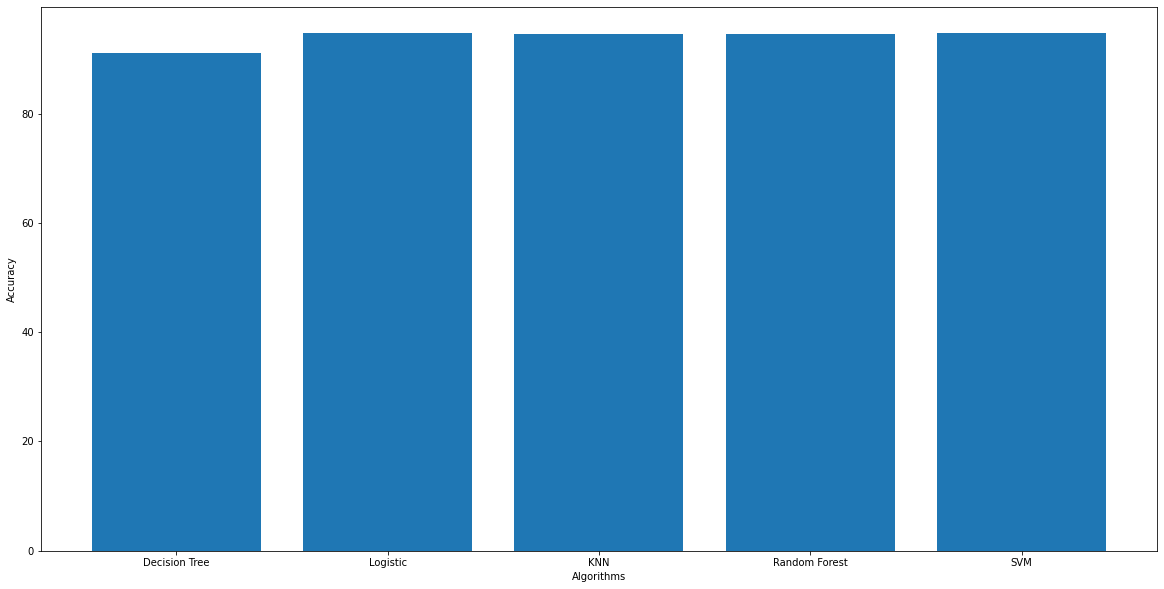

In [101]:
plt.bar(['Decision Tree', 'Logistic', 'KNN', 'Random Forest', 'SVM'],[ac_dt,ac_lr,ac_knn,ac_rf,ac_sv])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

In [102]:
lr

LogisticRegression()

In [103]:
#import pickle
#filename = r'C:\Users\HP\Desktop\Stroke Prediction\Stroke Prediction\finalized_model_lr.sav'
#pickle.dump(lr,open(filename,'wb'))

In [104]:
#good

In [105]:
#xgboost

In [106]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train_std,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [107]:
pridiction_xg_std=classifier.predict(X_test_std)

In [108]:
accuracy_xg_std_s=accuracy_score(Y_test,pridiction_xg_std)*100

In [109]:
accuracy_xg_std_s

94.6183953033268

In [110]:
import joblib
model_path=os.path.join('C:/Users/HP/Desktop/Stroke Prediction/Stroke Prediction/updated','models/classifier.sav')
joblib.dump(classifier,model_path)

['C:/Users/HP/Desktop/Stroke Prediction/Stroke Prediction/updated\\models/classifier.sav']

In [111]:
#gridsearchcv

In [112]:
df_fi=pd.read_csv(r'healthcare-dataset-stroke-data.csv')

In [113]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
#iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train_std,Y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [114]:
pridiction_gscv_std=clf.predict(X_test_std)

In [115]:
accuracy_gscv_std_s=accuracy_score(Y_test,pridiction_gscv_std)*100

In [116]:
accuracy_gscv_std_s

94.71624266144813

In [117]:
import joblib
model_path=os.path.join('C:/Users/HP/Desktop/Stroke Prediction/Stroke Prediction/updated','models/clf.sav')
joblib.dump(clf,model_path)

['C:/Users/HP/Desktop/Stroke Prediction/Stroke Prediction/updated\\models/clf.sav']

In [118]:
#navie bayes

In [119]:
from sklearn.naive_bayes import GaussianNB
bayes_classifier=GaussianNB()
bayes_classifier.fit(X_train_std,Y_train)

GaussianNB()

In [120]:
pridiction_nb_std=bayes_classifier.predict(X_test_std)

In [121]:
accuracy_nb_std_s=accuracy_score(Y_test,pridiction_nb_std)*100

In [122]:
accuracy_nb_std_s

86.98630136986301

In [123]:
#gradient boosting classifier

In [124]:
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier

seed = 7
num_trees = 50

In [125]:
kfold = model_selection.KFold(n_splits=10)
model = GradientBoostingClassifier(n_estimators=num_trees)
model.fit(X_train_std,Y_train)
# results = model_selection.cross_val_score(model, x, y, cv=kfold)
# results

GradientBoostingClassifier(n_estimators=50)

In [126]:
pridiction_gb_std=model.predict(X_test_std)

In [127]:
accuracy_gb_std_s=accuracy_score(Y_test,pridiction_gb_std)*100

In [128]:
accuracy_gb_std_s

94.6183953033268

In [129]:
accuracy_gb_std_s

94.6183953033268

In [130]:
import joblib
model_path=os.path.join('C:/Users/HP/Desktop/Stroke Prediction/Stroke Prediction/updated','models/model.sav')
joblib.dump(model,model_path)

['C:/Users/HP/Desktop/Stroke Prediction/Stroke Prediction/updated\\models/model.sav']

In [131]:
#voting classifier

In [132]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [133]:
# create the sub models
estimators = []
model1 = LogisticRegression(random_state=2)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier(random_state=2)
estimators.append(('cart', model2))
model3 = SVC(random_state=2)
estimators.append(('svm', model3))

In [134]:
# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train_std,Y_train)
# results = model_selection.cross_val_score(ensemble, x, y, cv=kfold)
# results

VotingClassifier(estimators=[('logistic', LogisticRegression(random_state=2)),
                             ('cart', DecisionTreeClassifier(random_state=2)),
                             ('svm', SVC(random_state=2))])

In [135]:
pridiction_vt_std=ensemble.predict(X_test_std)

In [136]:
accuracy_vt_std_s=accuracy_score(Y_test,pridiction_vt_std)*100

In [137]:
accuracy_vt_std_s

94.71624266144813

In [138]:
import joblib
model_path=os.path.join('C:/Users/HP/Desktop/Stroke Prediction/Stroke Prediction/updated','models/em.sav')
joblib.dump(ensemble,model_path)

['C:/Users/HP/Desktop/Stroke Prediction/Stroke Prediction/updated\\models/em.sav']

In [139]:
#bagging classifier

In [140]:
import numpy as np

In [141]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection

# kfold = model_selection.KFold(n_splits=10)
cart = DecisionTreeClassifier()

num_trees = 5

In [142]:
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees,random_state=2)
model.fit(X_train_std,Y_train)


# results = model_selection.cross_val_score(model, x, y, cv=kfold)

# results #nothing but accuracy of each decision tree

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5,
                  random_state=2)

In [143]:
pridiction_bt_std=model.predict(X_test_std)

In [144]:
accuracy_bt_std_s=accuracy_score(Y_test,pridiction_bt_std)*100

In [145]:
accuracy_bt_std_s

94.03131115459882

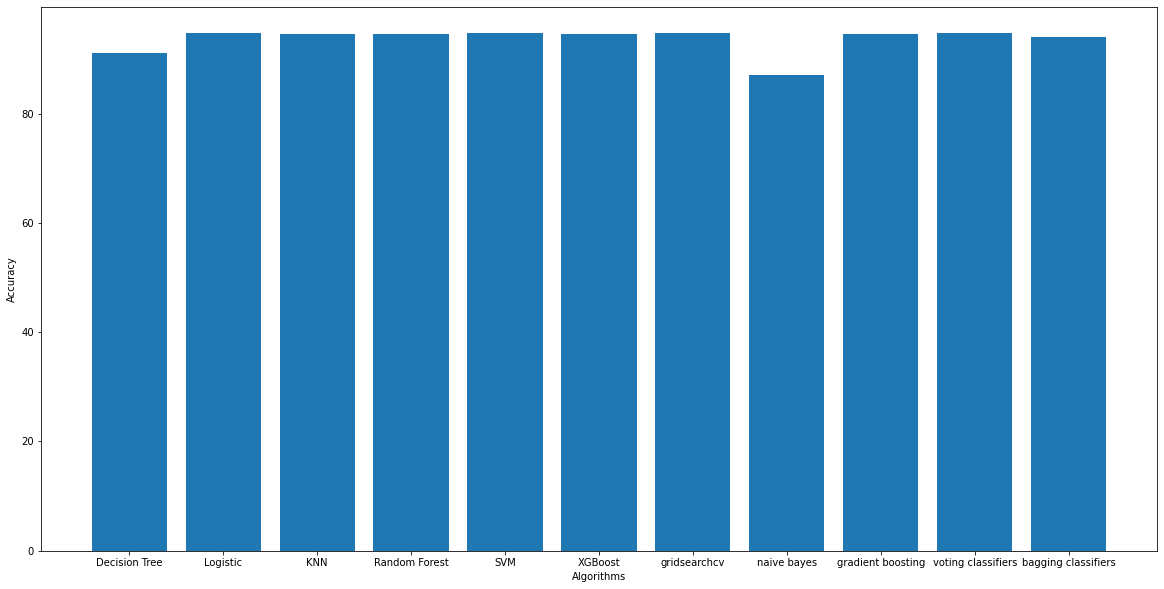

In [146]:
plt.bar(['Decision Tree', 'Logistic', 'KNN', 'Random Forest', 'SVM', 'XGBoost', 'gridsearchcv', 'naive bayes', 'gradient boosting','voting classifiers', 'bagging classifiers'],[ac_dt,ac_lr,ac_knn,ac_rf,ac_sv,accuracy_xg_std_s,accuracy_gscv_std_s,accuracy_nb_std_s,accuracy_gb_std_s,accuracy_vt_std_s,accuracy_bt_std_s])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()